**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
#!pip install sklearn.datasets.fetch_mldata
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KDTree
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

import operator

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors = 2, algorithm="brute", metric = "euclidean"):
        self.metric = metric
        self.n_neighbors = n_neighbors
        self.algorithm_bool = False
        self.algorithm = algorithm
        self.my_X = []
        self.my_Y = []

        if algorithm == "kd_tree":
            self.algorithm_bool = True

    def fit(self, X, y):
        #X, y = check_X_y(X, y)
        self.my_X = X
        self.my_Y = y

    
    def predict(self, X):
        #check_is_fitted(self)
        X = check_array(X)

        if self.algorithm_bool:
            kdt = KDTree(self.my_X, metric="euclidean")
            B, A = kdt.query(X, self.n_neighbors)

        elif self.metric == "euclidean":
            A = np.argsort(euclidean_distances(X, self.my_X), axis=1)[:,:self.n_neighbors]
            B = np.sort(euclidean_distances(X, self.my_X), axis=1)[:,:self.n_neighbors]
        else:
            A = np.argsort(1-cosine_similarity(X, self.my_X), axis=1)[:,:self.n_neighbors]
            B = np.sort(1-cosine_similarity(X, self.my_X), axis=1)[:,:self.n_neighbors]

        C = []
        for j in range(A.shape[0]):
            D = {}
            for i in range(self.n_neighbors):
                if A[j, i] in D:
                    D[A[j, i]] += B[j, i]
                else:
                    D[A[j, i]] = B[j, i]
            C.append(max(D.items(), key=operator.itemgetter(1))[0])

        return self.my_Y[C]
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier()

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(accuracy_score(y_test, my_clf_pred), accuracy_score(y_test, sklearn_pred))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.05, "Score must be simillar"

0.9473684210526315 0.9736842105263158


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 289 µs, sys: 281 µs, total: 570 µs
Wall time: 492 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 3.55 ms, sys: 0 ns, total: 3.55 ms
Wall time: 4.21 ms


array([2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 2.05 ms, sys: 0 ns, total: 2.05 ms
Wall time: 1.46 ms


array([2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.08 ms, sys: 0 ns, total: 1.08 ms
Wall time: 962 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.63 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 1.96 ms, sys: 393 µs, total: 2.35 ms
Wall time: 2.03 ms


array([1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 265 µs, sys: 245 µs, total: 510 µs
Wall time: 469 µs


array([1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
print(accuracy_score(y_test, my_clf_pred), accuracy_score(y_test, sklearn_pred))
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

1.0 1.0


**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

In [21]:
import matplotlib.pyplot as plt

n_neighbors_max = 10
features = 250 # Я ограничу число парамтеров до 250, это повлияет на точность, но зато будет быстрее. Для анализа это не важно.
A_plt = []
B_plt = []

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=3, max_df=10, max_features = features)
my_X = vectorizer.fit_transform(data).toarray()
my_y = target

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn.model_selection import cross_validate
clf = MyKNeighborsClassifier()
x3 = cross_validate(estimator=clf, X=my_X, y=my_y, cv=3, scoring="accuracy")
x3

{'fit_time': array([0.00779891, 0.00344586, 0.00340605]),
 'score_time': array([1.63972163, 1.57361317, 1.59846544]),
 'test_score': array([0.06124072, 0.06152214, 0.07053832])}

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

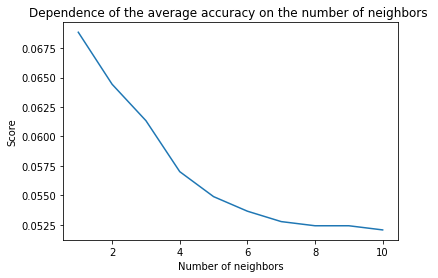

In [24]:

A, B = [], []

for i in range(1, n_neighbors_max+1):
    #print(i)
    clf = MyKNeighborsClassifier(n_neighbors=i, algorithm="brute")
    my_dict = cross_validate(estimator=clf, X=my_X, y=my_y, cv=3, scoring="accuracy")
    A.append(i)
    B.append(my_dict['test_score'].mean())

plt.plot(A, B)
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.title('Dependence of the average accuracy on the number of neighbors ')
plt.show()
A_plt.append(A)
B_plt.append(B)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

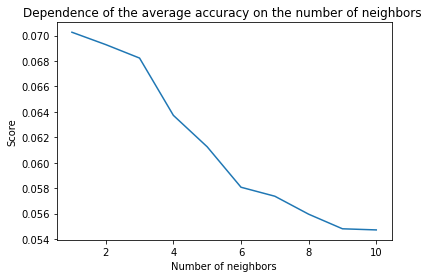

In [25]:
A, B = [], []

for i in range(1, n_neighbors_max+1):
    clf = MyKNeighborsClassifier(n_neighbors=i, metric="cosine_similarity")
    my_dict = cross_validate(estimator=clf, X=my_X, y=my_y, cv=3, scoring="accuracy")
    A.append(i)
    B.append(my_dict['test_score'].mean())

plt.plot(A, B)
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.title('Dependence of the average accuracy on the number of neighbors ')
plt.show()
A_plt.append(A)
B_plt.append(B)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=3, max_df=10, max_features = features)
my_X = vectorizer.fit_transform(data).toarray()
my_y = target

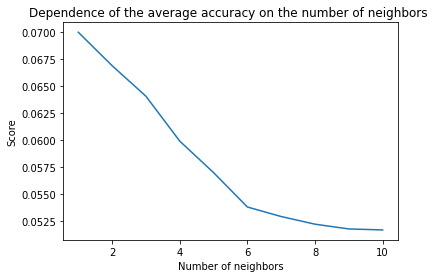

In [27]:
A, B = [], []

for i in range(1, n_neighbors_max+1):
    clf = MyKNeighborsClassifier(n_neighbors=i, algorithm="brute")
    my_dict = cross_validate(estimator=clf, X=my_X, y=my_y, cv=3, scoring="accuracy")
    A.append(i)
    B.append(my_dict['test_score'].mean())

plt.plot(A, B)
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.title('Dependence of the average accuracy on the number of neighbors ')
plt.show()
A_plt.append(A)
B_plt.append(B)

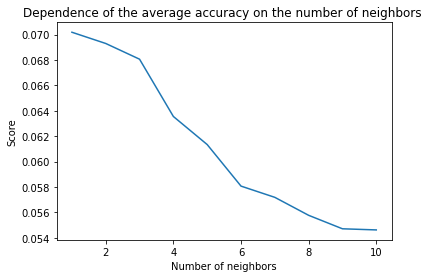

In [28]:
A, B = [], []

for i in range(1, n_neighbors_max+1):
    clf = MyKNeighborsClassifier(n_neighbors=i, metric="cosine_similarity")
    my_dict = cross_validate(estimator=clf, X=my_X, y=my_y, cv=3, scoring="accuracy")
    A.append(i)
    B.append(my_dict['test_score'].mean())

plt.plot(A, B)
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.title('Dependence of the average accuracy on the number of neighbors ')
plt.show()
A_plt.append(A)
B_plt.append(B)

Изобразим всё на одном графике

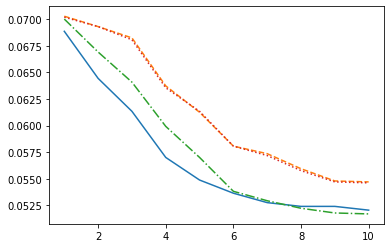

In [29]:
plt.plot(A_plt[0], B_plt[0], '-', A_plt[1], B_plt[1], '--', A_plt[2], B_plt[2], '-.', A_plt[3], B_plt[3], ':')

Как видно, лучше всего использовать 1 соседа, TfidfVectorizer и косинусную меру

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [30]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [31]:
data = newsgroups['data']
target = newsgroups['target']

In [32]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=10, max_features = features)

In [33]:
clf = MyKNeighborsClassifier(n_neighbors=1, metric="cosine_similarity")
clf.fit(my_X, my_y)

In [34]:
my_clf_pred = clf.predict(vectorizer.fit_transform(data).toarray())

In [35]:
accuracy_score(my_clf_pred,target)

0.05523101433882103

Результаты чуть хуже. Всё-таки валидация нужна. 